# Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split

# Import data

In [2]:
df = pd.read_csv('dataset/adult.csv')
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


### Data description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The prediction task is to determine whether a person makes over $50K a year.

In [3]:
df.shape

(48842, 15)

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [6]:
# Calcola la distribuzione percentuale della variabile target 'income'
income_distribution = df['income'].value_counts(normalize=True) * 100

# Visualizza i risultati
print(income_distribution)

<=50K    76.071823
>50K     23.928177
Name: income, dtype: float64


### Mapping dell'outcome
Siccome la feature di interesse è income e questa è rappresentata come stringa la codifichiamo come 0 quando il reddito è <=50K e con 1 quando è >50K

In [6]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [7]:
df.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842.000000
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,NaN
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,0.239282
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,0.426649
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


# Data Cleaning

Le feature "workclass","native-country","occupation" hanno molti valori a '?', si sostituiscono con nan

In [8]:
from numpy import nan
df = df.replace('?',nan)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0


### Conteggio valori null

In "workclass","native-country","occupation" i valori a null sono presenti

In [9]:
# Conta il numero di valori NaN per ciascuna colonna
nan_counts = df.isna().sum()

# Crea un DataFrame per visualizzare i risultati
nan_counts_df = pd.DataFrame(nan_counts, columns=['Number of NaNs'])

# Aggiungi una colonna per la percentuale di NaNs
nan_counts_df['Percentage of NaNs'] = (nan_counts_df['Number of NaNs'] / len(df)) * 100

# Ordina il DataFrame in base al numero di NaNs in ordine decrescente
nan_counts_df = nan_counts_df.sort_values(by='Number of NaNs', ascending=False)

# Visualizza il risultato
print(nan_counts_df)


                 Number of NaNs  Percentage of NaNs
occupation                 2809            5.751198
workclass                  2799            5.730724
native-country              857            1.754637
age                           0            0.000000
fnlwgt                        0            0.000000
education                     0            0.000000
educational-num               0            0.000000
marital-status                0            0.000000
relationship                  0            0.000000
race                          0            0.000000
gender                        0            0.000000
capital-gain                  0            0.000000
capital-loss                  0            0.000000
hours-per-week                0            0.000000
income                        0            0.000000


### Check delle categorie per ogni feature di tipo object

In [10]:
print('workclass',df.workclass.unique())
print('education',df.education.unique())
print('marital-status',df['marital-status'].unique())
print('occupation',df.occupation.unique())
print('relationship',df.relationship.unique())
print('race',df.race.unique())
print('gender',df.gender.unique())
print('native-country',df['native-country'].unique())


workclass ['Private' 'Local-gov' nan 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
marital-status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' nan
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
relationship ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
race ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
gender ['Male' 'Female']
native-country ['United-States' nan 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 

lets look the data it again:  with the help of above oprations all null values the remove,he
now our data is null free.

### Accorpamento 'native-country'
La feature 'native-country' ha troppe categorie in un'ottica successiva di one hot encoding ha senso accorparle per regioni 

In [11]:
# Creare un dizionario che mappa ogni paese alla sua rispettiva regione geografica
region_mapping = {
    'United-States': 'North America', 'Canada': 'North America', 'Outlying-US(Guam-USVI-etc)': 'North America',
    'Mexico': 'North America', 'Cuba': 'North America', 'Puerto-Rico': 'North America',
    
    'Peru': 'South America', 'Guatemala': 'Central America', 'Dominican-Republic': 'Central America',
    'El-Salvador': 'Central America', 'Columbia': 'South America', 'Honduras': 'Central America',
    'Ecuador': 'South America', 'Nicaragua': 'Central America', 'Jamaica': 'Central America',
    'Trinadad&Tobago': 'Central America',
    
    'Germany': 'Europe', 'Ireland': 'Europe', 'England': 'Europe', 'Italy': 'Europe', 'Poland': 'Europe', 
    'Portugal': 'Europe', 'France': 'Europe', 'Greece': 'Europe', 'Yugoslavia': 'Europe',
    'Hungary': 'Europe', 'Scotland': 'Europe', 'Holand-Netherlands': 'Europe',
    
    'Philippines': 'Asia', 'Thailand': 'Asia', 'Vietnam': 'Asia', 'Japan': 'Asia', 'India': 'Asia', 
    'Cambodia': 'Asia', 'Laos': 'Asia', 'China': 'Asia', 'Taiwan': 'Asia', 'Iran': 'Asia', 'Hong': 'Asia',
    
    'Haiti': 'Caribbean', 'South': 'Other'
}

# Applica la mappatura alla colonna 'native-country'
df['native-country'] = df['native-country'].replace(region_mapping)

# Verifica il risultato
print(df['native-country'].value_counts(dropna=False))

North America      45310
Asia                 981
NaN                  857
Europe               780
Central America      548
South America        176
Other                115
Caribbean             75
Name: native-country, dtype: int64


### Accorpamento 'education'

In [12]:
# Definire una mappa per raggruppare le categorie di 'education' in categorie più ampie
education_mapping = {
    'Preschool': 'Low Education',
    '10th': 'Low Education', '11th': 'Low Education', '12th': 'Low Education',
    '1st-4th': 'Low Education', '5th-6th': 'Low Education', '7th-8th': 'Low Education', '9th': 'Low Education',
    'Some-college': 'Low Education',
    'HS-grad': 'High School', 'HS-grad': 'High School',
    'Assoc-acdm': 'Associate Degree', 'Assoc-voc': 'Associate Degree',
    'Bachelors': 'Bachelor’s Degree',
    'Masters': 'Graduate Degree', 'Prof-school': 'Graduate Degree', 'Doctorate': 'Graduate Degree'
}

# Applicare la mappatura alla colonna 'education'
df['education'] = df['education'].replace(education_mapping)

# Verificare il risultato
print(df['education'].value_counts(dropna=False))

Low Education        17286
High School          15784
Bachelor’s Degree     8025
Graduate Degree       4085
Associate Degree      3662
Name: education, dtype: int64


### Accorpamento 'occupation'

In [13]:
# Definire una mappa per raggruppare le categorie di 'occupation' in categorie più ampie
occupation_mapping = {
    'Machine-op-inspct': 'Manual Labor', 'Farming-fishing': 'Manual Labor',
    'Protective-serv': 'Service Occupations', 'Other-service': 'Service Occupations',
    'Prof-specialty': 'Professional Occupations', 'Craft-repair': 'Craft and Repair',
    'Adm-clerical': 'Management Occupations', 'Exec-managerial': 'Management Occupations',
    'Tech-support': 'Professional Occupations', 'Sales': 'Sales Occupations',
    'Priv-house-serv': 'Service Occupations', 'Transport-moving': 'Manual Labor',
    'Handlers-cleaners': 'Manual Labor', 'Armed-Forces': 'Armed Forces'
}

# Applicare la mappatura alla colonna 'occupation'
df['occupation'] = df['occupation'].replace(occupation_mapping)

# Verificare il risultato
print(df['occupation'].value_counts(dropna=False))


Management Occupations      11697
Manual Labor                 8939
Professional Occupations     7618
Service Occupations          6148
Craft and Repair             6112
Sales Occupations            5504
NaN                          2809
Armed Forces                   15
Name: occupation, dtype: int64


### Accorpamento 'workclass'

In [14]:
# Definire una mappa per raggruppare le categorie di 'workclass' in categorie più ampie
workclass_mapping = {
    'Private': 'Private Sector',
    'Local-gov': 'Government', 'Federal-gov': 'Government', 'State-gov': 'Government',
    'Self-emp-not-inc': 'Self-Employment', 'Self-emp-inc': 'Self-Employment',
    'Without-pay': 'Other', 'Never-worked': 'Other'
}

# Applicare la mappatura alla colonna 'workclass'
df['workclass'] = df['workclass'].replace(workclass_mapping)

# Verificare il risultato
print(df['workclass'].value_counts(dropna=False))


Private Sector     33906
Government          6549
Self-Employment     5557
NaN                 2799
Other                 31
Name: workclass, dtype: int64


In [15]:
# Conta il numero di valori NaN per ciascuna colonna
nan_counts = df.isna().sum()

# Crea un DataFrame per visualizzare i risultati
nan_counts_df = pd.DataFrame(nan_counts, columns=['Number of NaNs'])

# Aggiungi una colonna per la percentuale di NaNs
nan_counts_df['Percentage of NaNs'] = (nan_counts_df['Number of NaNs'] / len(df)) * 100

# Ordina il DataFrame in base al numero di NaNs in ordine decrescente
nan_counts_df = nan_counts_df.sort_values(by='Number of NaNs', ascending=False)

# Visualizza il risultato
print(nan_counts_df)

                 Number of NaNs  Percentage of NaNs
occupation                 2809            5.751198
workclass                  2799            5.730724
native-country              857            1.754637
age                           0            0.000000
fnlwgt                        0            0.000000
education                     0            0.000000
educational-num               0            0.000000
marital-status                0            0.000000
relationship                  0            0.000000
race                          0            0.000000
gender                        0            0.000000
capital-gain                  0            0.000000
capital-loss                  0            0.000000
hours-per-week                0            0.000000
income                        0            0.000000


### Controllo duplicati e rimozione

In [16]:
# Supponiamo che df_encoded sia il DataFrame con le feature codificate
# Verifica il numero di righe duplicate
num_duplicates = df.duplicated().sum()

print(f"Numero di righe duplicate: {num_duplicates}")


Numero di righe duplicate: 71


In [17]:
# Rimuovi i duplicati
df_encoded_clean = df.drop_duplicates()

# Verifica di nuovo il numero di righe duplicate
num_duplicates_clean = df_encoded_clean.duplicated().sum()
print(f"Numero di righe duplicate dopo la pulizia: {num_duplicates_clean}")


Numero di righe duplicate dopo la pulizia: 0


In [18]:
# Conta il numero di valori NaN per ciascuna colonna
nan_counts = df.isna().sum()

# Crea un DataFrame per visualizzare i risultati
nan_counts_df = pd.DataFrame(nan_counts, columns=['Number of NaNs'])

# Aggiungi una colonna per la percentuale di NaNs
nan_counts_df['Percentage of NaNs'] = (nan_counts_df['Number of NaNs'] / len(df)) * 100

# Ordina il DataFrame in base al numero di NaNs in ordine decrescente
nan_counts_df = nan_counts_df.sort_values(by='Number of NaNs', ascending=False)

# Visualizza il risultato
print(nan_counts_df)

                 Number of NaNs  Percentage of NaNs
occupation                 2809            5.751198
workclass                  2799            5.730724
native-country              857            1.754637
age                           0            0.000000
fnlwgt                        0            0.000000
education                     0            0.000000
educational-num               0            0.000000
marital-status                0            0.000000
relationship                  0            0.000000
race                          0            0.000000
gender                        0            0.000000
capital-gain                  0            0.000000
capital-loss                  0            0.000000
hours-per-week                0            0.000000
income                        0            0.000000


### Split del dataset in training e test (70%-30%)

In [19]:
# Esegui lo split del dataset in training e test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Conta i valori NaN nel dataset di addestramento e test
def count_nans(dataframe):
    nan_counts = dataframe.isna().sum()
    nan_counts_df = pd.DataFrame(nan_counts, columns=['Number of NaNs'])
    nan_counts_df['Percentage of NaNs'] = (nan_counts_df['Number of NaNs'] / len(dataframe)) * 100
    return nan_counts_df.sort_values(by='Number of NaNs', ascending=False)

print("Training Set NaNs:")
print(count_nans(train_df))

print("\nTest Set NaNs:")
print(count_nans(test_df))


Training Set NaNs:
                 Number of NaNs  Percentage of NaNs
occupation                 2273            5.817316
workclass                  2264            5.794282
native-country              671            1.717298
age                           0            0.000000
fnlwgt                        0            0.000000
education                     0            0.000000
educational-num               0            0.000000
marital-status                0            0.000000
relationship                  0            0.000000
race                          0            0.000000
gender                        0            0.000000
capital-gain                  0            0.000000
capital-loss                  0            0.000000
hours-per-week                0            0.000000
income                        0            0.000000

Test Set NaNs:
                 Number of NaNs  Percentage of NaNs
occupation                  536            5.486744
workclass                   5

In [20]:
# Conta il numero di valori NaN per ciascuna colonna
nan_counts = train_df.isna().sum()

# Crea un DataFrame per visualizzare i risultati
nan_counts_df = pd.DataFrame(nan_counts, columns=['Number of NaNs'])

# Aggiungi una colonna per la percentuale di NaNs
nan_counts_df['Percentage of NaNs'] = (nan_counts_df['Number of NaNs'] / len(df)) * 100

# Ordina il DataFrame in base al numero di NaNs in ordine decrescente
nan_counts_df = nan_counts_df.sort_values(by='Number of NaNs', ascending=False)

# Visualizza il risultato
print(nan_counts_df)

                 Number of NaNs  Percentage of NaNs
occupation                 2273            4.653782
workclass                  2264            4.635355
native-country              671            1.373818
age                           0            0.000000
fnlwgt                        0            0.000000
education                     0            0.000000
educational-num               0            0.000000
marital-status                0            0.000000
relationship                  0            0.000000
race                          0            0.000000
gender                        0            0.000000
capital-gain                  0            0.000000
capital-loss                  0            0.000000
hours-per-week                0            0.000000
income                        0            0.000000


### Calcolo il valore più frequente nel training set per: 
- native-country
- workclass
- occupation

In [21]:
# Calcola il valore più frequente per ciascuna delle colonne specificate
most_frequent_native_country = train_df['native-country'].mode()[0]
most_frequent_workclass = train_df['workclass'].mode()[0]
most_frequent_occupation = train_df['occupation'].mode()[0]

# Stampa i risultati
print(f"Valore più frequente in 'native-country': {most_frequent_native_country}")
print(f"Valore più frequente in 'workclass': {most_frequent_workclass}")
print(f"Valore più frequente in 'occupation': {most_frequent_occupation}")


Valore più frequente in 'native-country': North America
Valore più frequente in 'workclass': Private Sector
Valore più frequente in 'occupation': Management Occupations


### Sostituisce i valori mancanti (NaN) con il valore più frequente
Valore più frequente che ho calcolato solo sul training set per evitare data leakage 

In [22]:
# Sostituisci i valori NaN con i valori più frequenti
test_df['native-country'].fillna(most_frequent_native_country, inplace=True)
test_df['workclass'].fillna(most_frequent_workclass, inplace=True)
test_df['occupation'].fillna(most_frequent_occupation, inplace=True)

# Verifica i risultati per assicurarti che i NaN siano stati sostituiti
print(test_df[['native-country', 'workclass', 'occupation']].isna().sum())

native-country    0
workclass         0
occupation        0
dtype: int64


C:\Users\sonia\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [23]:
# Sostituisci i valori NaN con i valori più frequenti
train_df['native-country'].fillna(most_frequent_native_country, inplace=True)
train_df['workclass'].fillna(most_frequent_workclass, inplace=True)
train_df['occupation'].fillna(most_frequent_occupation, inplace=True)

# Verifica i risultati per assicurarti che i NaN siano stati sostituiti
print(train_df[['native-country', 'workclass', 'occupation']].isna().sum())

native-country    0
workclass         0
occupation        0
dtype: int64


In [24]:
# Stampa l'elenco delle feature (colonne) di train_df
features = train_df.columns

# Stampa l'elenco completo delle feature in formato verticale
for feature in features:
    print(feature)


age
workclass
fnlwgt
education
educational-num
marital-status
occupation
relationship
race
gender
capital-gain
capital-loss
hours-per-week
native-country
income


In [25]:
# Stampa l'elenco delle feature (colonne) di train_df
features = test_df.columns

# Stampa l'elenco completo delle feature in formato verticale
for feature in features:
    print(feature)


age
workclass
fnlwgt
education
educational-num
marital-status
occupation
relationship
race
gender
capital-gain
capital-loss
hours-per-week
native-country
income


#### Le feature categoriali vanno codificate con la one hot encoding 

In [26]:
# Seleziona le feature categoriali
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

# Applica One-Hot Encoding alle feature categoriali
df_encoded = pd.get_dummies(train_df, columns=categorical_cols)

# Visualizza il nuovo DataFrame con le feature numeriche
print(df_encoded.head())


       age  fnlwgt  educational-num  capital-gain  capital-loss  \
37193   42  145175               10             0             0   
31093   52  175029                6             0             0   
33814   34  172664                9             0             0   
14500   28  125791                9             0             0   
23399   46   28419               11             0             0   

       hours-per-week  income  workclass_Government  workclass_Other  \
37193              40       0                     0                0   
31093              35       0                     0                0   
33814              40       0                     1                0   
14500              40       0                     0                0   
23399              50       0                     0                0   

       workclass_Private Sector  ...  race_White  gender_Female  gender_Male  \
37193                         1  ...           1              0            1   
3109

In [27]:
print(df_encoded.sample(1).T)  # La trasposizione .T ti permette di vedere tutte le feature verticalmente

                                       41690
age                                       19
fnlwgt                                184121
educational-num                            9
capital-gain                               0
capital-loss                               0
hours-per-week                            20
income                                     0
workclass_Government                       0
workclass_Other                            0
workclass_Private Sector                   1
workclass_Self-Employment                  0
education_Associate Degree                 0
education_Bachelor’s Degree                0
education_Graduate Degree                  0
education_High School                      1
education_Low Education                    0
marital-status_Divorced                    0
marital-status_Married-AF-spouse           0
marital-status_Married-civ-spouse          0
marital-status_Married-spouse-absent       0
marital-status_Never-married               1
marital-st

In [28]:
# Ottieni i nomi delle colonne come una lista
feature_list = df_encoded.columns.tolist()

# Stampa ogni feature su una riga separata
for feature in feature_list:
    print(feature)
    

age
fnlwgt
educational-num
capital-gain
capital-loss
hours-per-week
income
workclass_Government
workclass_Other
workclass_Private Sector
workclass_Self-Employment
education_Associate Degree
education_Bachelor’s Degree
education_Graduate Degree
education_High School
education_Low Education
marital-status_Divorced
marital-status_Married-AF-spouse
marital-status_Married-civ-spouse
marital-status_Married-spouse-absent
marital-status_Never-married
marital-status_Separated
marital-status_Widowed
occupation_Armed Forces
occupation_Craft and Repair
occupation_Management Occupations
occupation_Manual Labor
occupation_Professional Occupations
occupation_Sales Occupations
occupation_Service Occupations
relationship_Husband
relationship_Not-in-family
relationship_Other-relative
relationship_Own-child
relationship_Unmarried
relationship_Wife
race_Amer-Indian-Eskimo
race_Asian-Pac-Islander
race_Black
race_Other
race_White
gender_Female
gender_Male
native-country_Asia
native-country_Caribbean
native-

In [29]:
# Seleziona le feature categoriali
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

# Applica One-Hot Encoding alle feature categoriali
df_encoded2 = pd.get_dummies(test_df, columns=categorical_cols)

# Visualizza il nuovo DataFrame con le feature numeriche
print(df_encoded2.head())

       age  fnlwgt  educational-num  capital-gain  capital-loss  \
7762    56   33115                9             0             0   
23881   25  112847                9             0             0   
30507   43  170525               13         14344             0   
28911   32  186788                9             0             0   
19484   39  277886               13             0             0   

       hours-per-week  income  workclass_Government  workclass_Other  \
7762               40       0                     0                0   
23881              40       0                     0                0   
30507              40       1                     0                0   
28911              40       0                     0                0   
19484              30       0                     0                0   

       workclass_Private Sector  ...  race_White  gender_Female  gender_Male  \
7762                          1  ...           1              1            0   
2388

In [30]:
# Ottieni i nomi delle colonne come una lista
feature_list2 = df_encoded2.columns.tolist()

# Stampa ogni feature su una riga separata
for feature in feature_list2:
    print(feature)
    

age
fnlwgt
educational-num
capital-gain
capital-loss
hours-per-week
income
workclass_Government
workclass_Other
workclass_Private Sector
workclass_Self-Employment
education_Associate Degree
education_Bachelor’s Degree
education_Graduate Degree
education_High School
education_Low Education
marital-status_Divorced
marital-status_Married-AF-spouse
marital-status_Married-civ-spouse
marital-status_Married-spouse-absent
marital-status_Never-married
marital-status_Separated
marital-status_Widowed
occupation_Armed Forces
occupation_Craft and Repair
occupation_Management Occupations
occupation_Manual Labor
occupation_Professional Occupations
occupation_Sales Occupations
occupation_Service Occupations
relationship_Husband
relationship_Not-in-family
relationship_Other-relative
relationship_Own-child
relationship_Unmarried
relationship_Wife
race_Amer-Indian-Eskimo
race_Asian-Pac-Islander
race_Black
race_Other
race_White
gender_Female
gender_Male
native-country_Asia
native-country_Caribbean
native-

In [31]:
# Salva i DataFrame in file CSV
df_encoded.to_csv('dataset/train_data.csv', index=False)
df_encoded2.to_csv('dataset/test_data.csv', index=False)

print("I file CSV sono stati salvati con successo.")

I file CSV sono stati salvati con successo.


# Exploratory Data Analysis

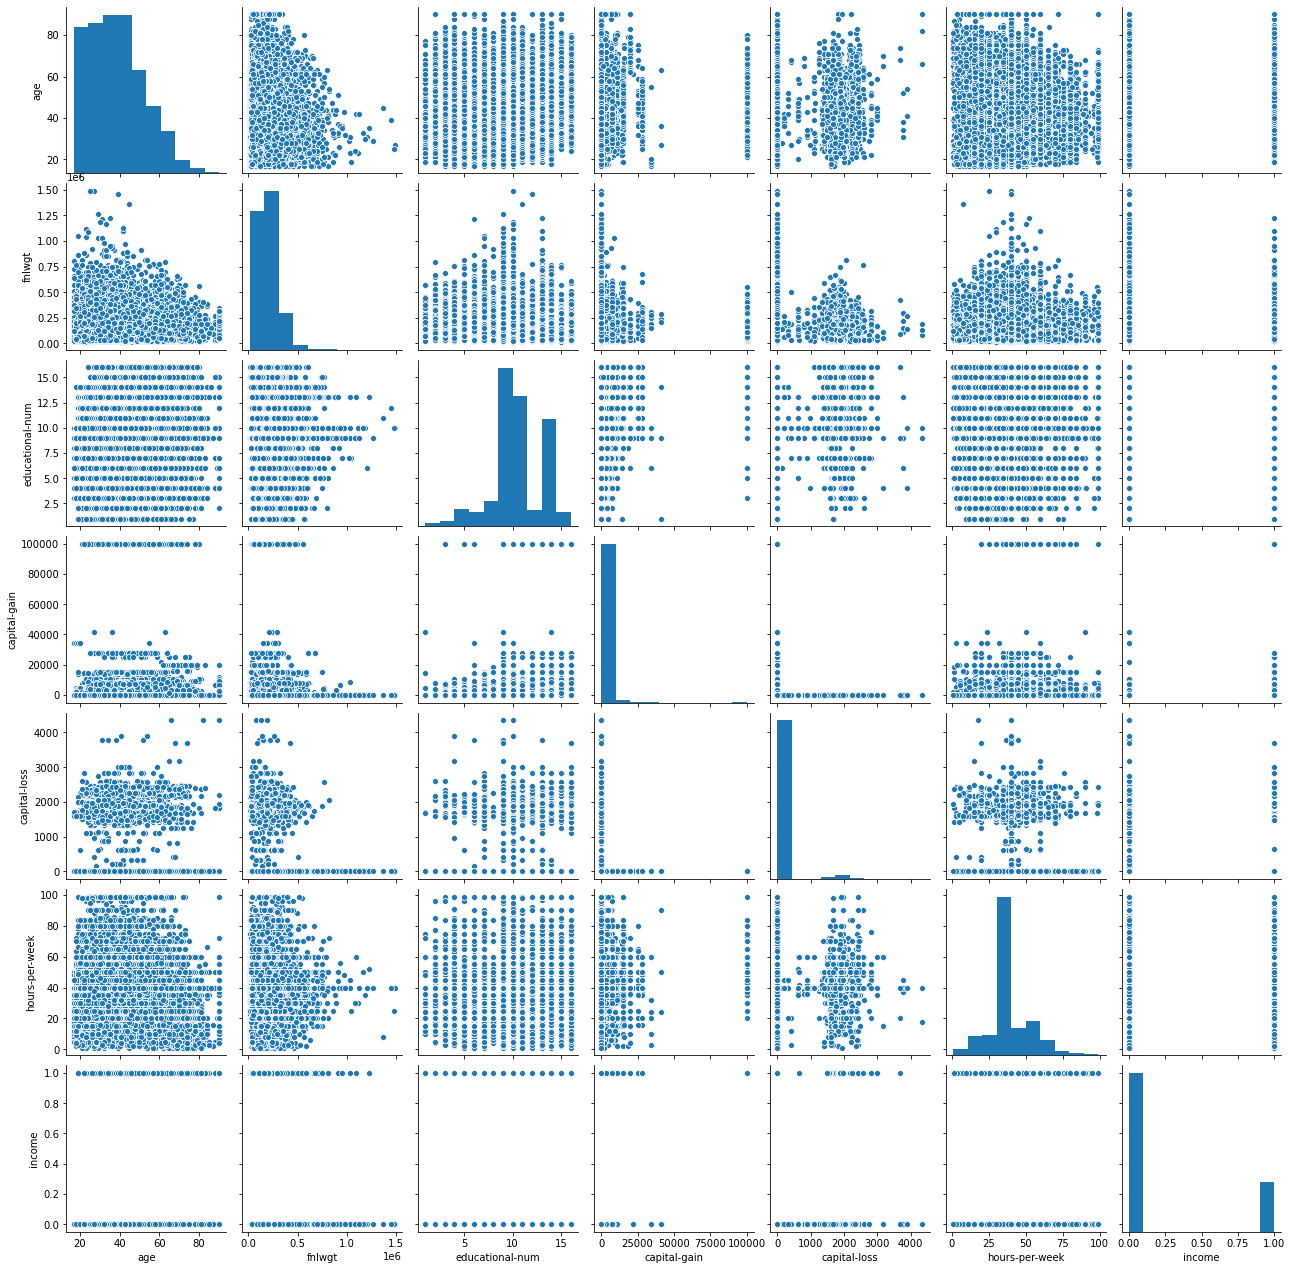

In [19]:
sns.pairplot(df)

# Univariate analysis

# Age Distribution:

<function matplotlib.pyplot.show(*args, **kw)>

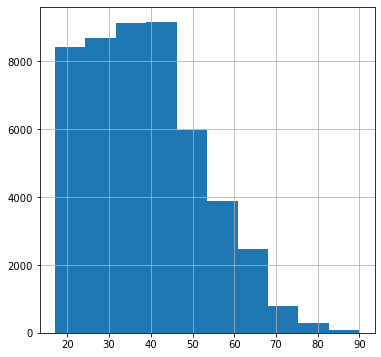

In [20]:
df['age'].hist(figsize = (6,6))
plt.show

By observation age attribute is right-skewed and not symetric.
min and max age in btw 17 to 90.

# finalwieght Distribution:

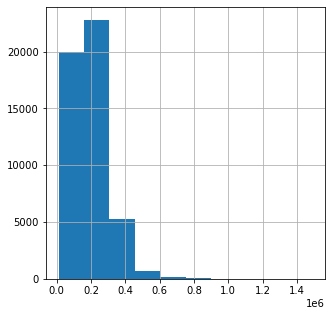

In [21]:
df['fnlwgt'].hist(figsize = (5,5))
plt.show()

It seems like Rightly skewed.

# Capital Gain Distribution:

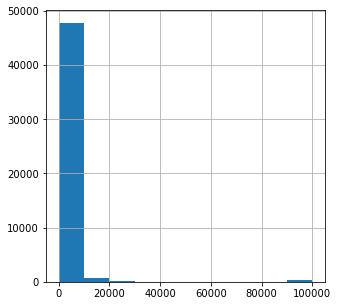

In [22]:
df['capital-gain'].hist(figsize=(5,5))
plt.show()

capital-gain shows that either a person has no gain or has gain of very large amount(10k or 99k).

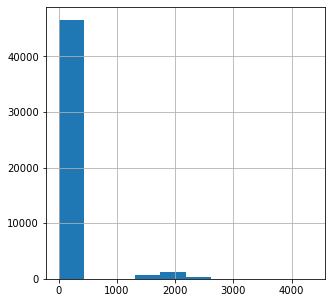

In [23]:
df['capital-loss'].hist(figsize=(5,5))
plt.show()

This histogram shows that most of the "capital-loss" values are centered on 0 and only few are non zero(2282).
This attribute is similar to the capital-gain i.e. most of the values are centered on 0(nearly 43000 of them)


# Relation btw in capital-gain and capital-loss

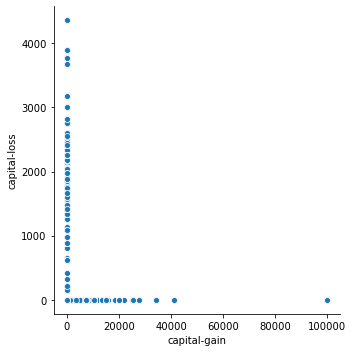

In [24]:
sns.relplot('capital-gain','capital-loss',data= df)
plt.xlabel('capital-gain')
plt.ylabel('capital-loss')
plt.show()

1.both capital-gain and capital-loss can be zero(0)
2.if capital-gain is Zero then capital-loss being high or above zero.
3.if capital-loss is Zero then capital-gain being high or above zero.

In [25]:
df.head(1)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private Sector,226802,Low Education,7,Never-married,Manual Labor,Own-child,Black,Male,0,0,40,North America,0


# Hours-per-week Distribution:

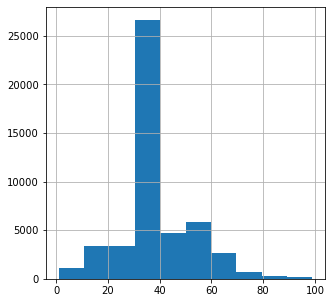

In [26]:
df['hours-per-week'].hist(figsize=(5,5))
plt.show()

In this data the hours per week atrribute varies within the range of 1 to 99.
By observayion,30-40 hrs people work per week,around 27000 people.
There are also few people who works 80-100 hours per week and some less than 20 which is unusual.

# Workclass Distribution:

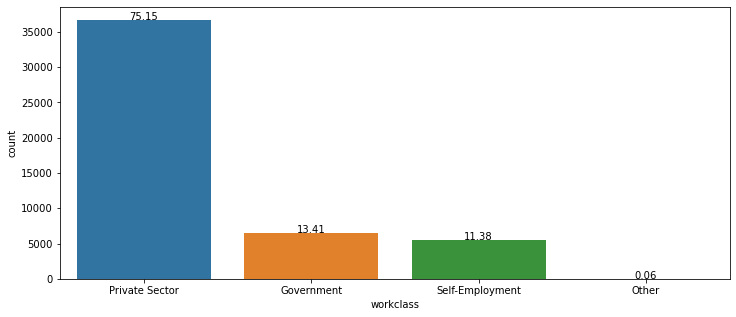

In [27]:
plt.figure(figsize=(12,5))

total = float(len(df['income']))

a = sns.countplot(x='workclass',data=df)

for f in a.patches:
    height = f.get_height()
    a.text(f.get_x() + f.get_width()/2., height+3, '{:1.2f}'.format((height/total)*100),ha="center")
plt.show()

most of them belong to private workclass that is around 75%.
without-play and never-play workclass has min count

# Education Distribution:

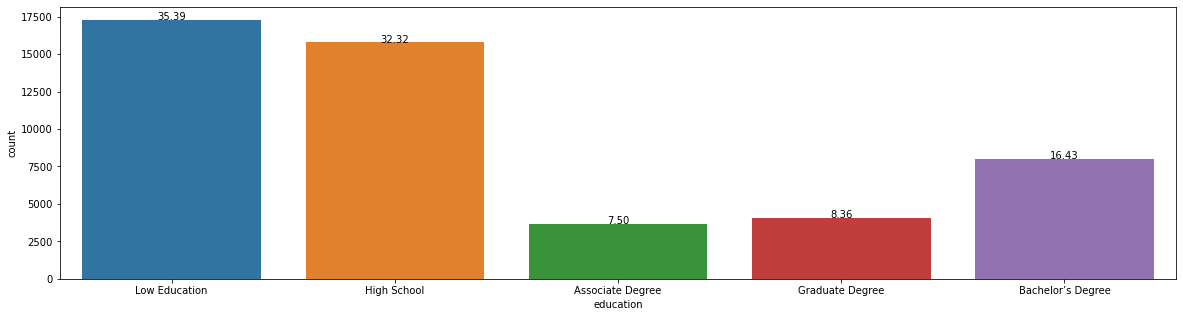

In [28]:
plt.figure(figsize=(20,5))

a= float(len(['income']))

a= sns.countplot(x='education',data=df)
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')
plt.show()
    

Hs-grad has 32.32% of all the education attribute.
pre-school has min.

# marital-status Distribution:

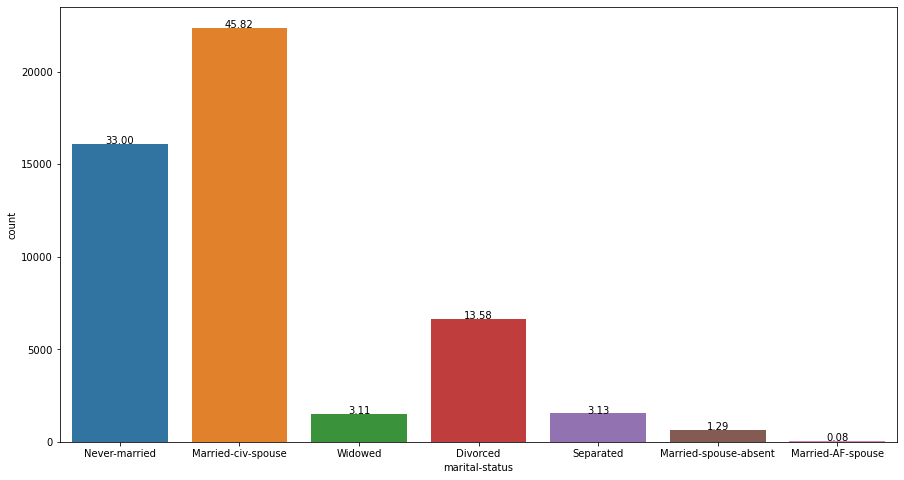

In [29]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="marital-status", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


Married-civ-spouse has maximum number of samples.
Married-AF-spouse has minimum number of obs.


# Occupation Distribution:

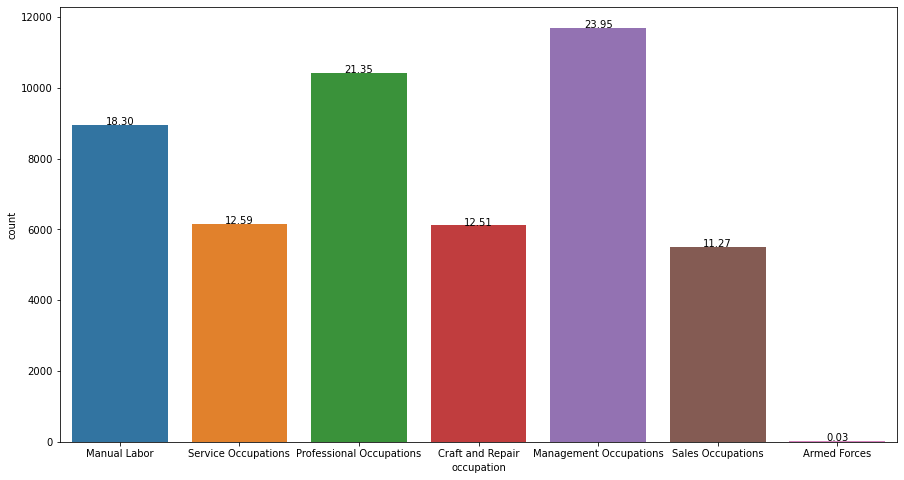

In [30]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="occupation", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


Prof-specialty has the maximum count.
Armed-Forces has minimum samples in the occupation attribute.

# Relationship Distribution:
    

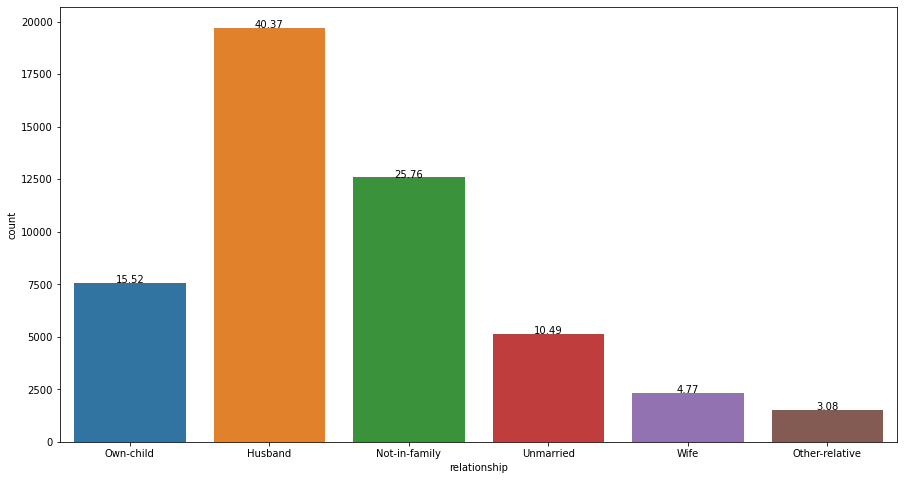

In [31]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="relationship", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


Husband has maximum percentage among all.

# Race Distribution:

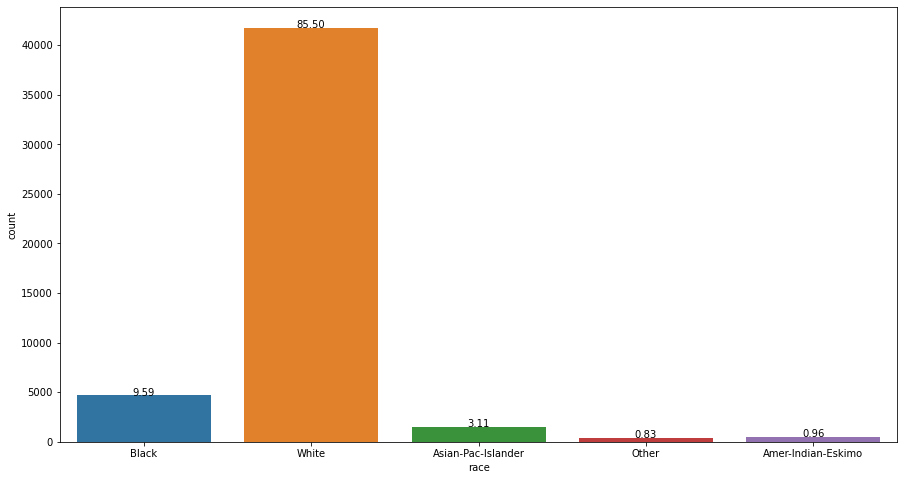

In [32]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="race", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


white is maximun among all about 85.50%.
black is second maximun.

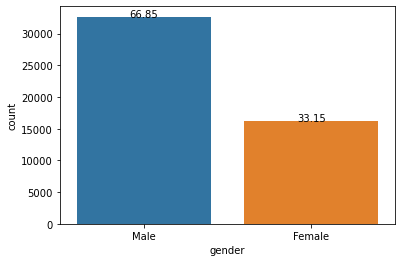

In [33]:
# plt.figure(figsize=(5,5))
total = float(len(df) )

ax = sns.countplot(x="gender", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


there are 2 unique categories in gender.
frequency of male is higher than female.


# Income(TArget variable) Distribution:

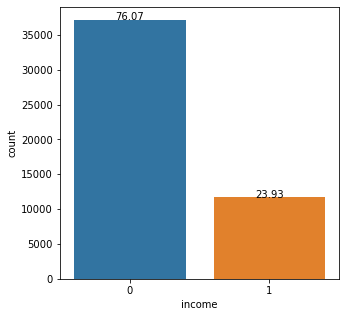

In [34]:
plt.figure(figsize=(5,5))
total = float(len(df) )

ax = sns.countplot(x="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


In income there is 2 group,group1(who earns more than 50k) 23.93% belong to income and group2(who earns less than 50k) 76% belong to income

# 2.Bivariate analysis


# Boxplot(Age relationship with income):

<function matplotlib.pyplot.show(*args, **kw)>

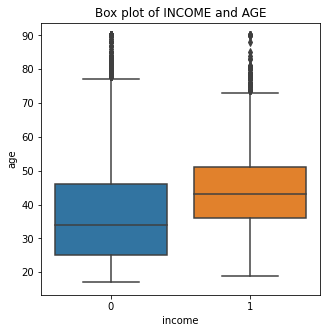

In [35]:
#Box plots
#--------------------------------------------------------------------------------
fig = plt.figure(figsize=(5,5))
sns.boxplot(x='income',y='age',data=df).set_title('Box plot of INCOME and AGE')
#blue_patch = mpatches.patch(color='blue',label='class_1')
#orange_patch = mpatches.patch(color='orange',label='class_2')
#plt.legend(handels=[blue_patch,orange_patch],loc=1)
plt.show

Income group(<=50k) has lower median "age"(34 year) than the Income group(>50k) which has median "age"(42 year).

# Boxplot(workclass relationship with income):


Text(0.5, 1.0, 'workclass vs count')

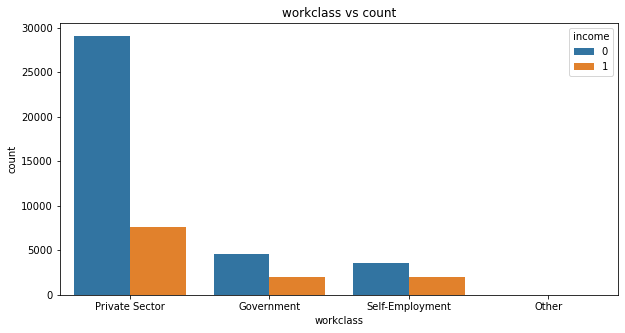

In [36]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='workclass',hue ='income',data=df).set_title("workclass vs count")


The data seems to mainly consist private employees.

In All the workclasses number of people earning less then 50k are more then those earning 50k.

# Boxplot (capital-gain Relationship with income):


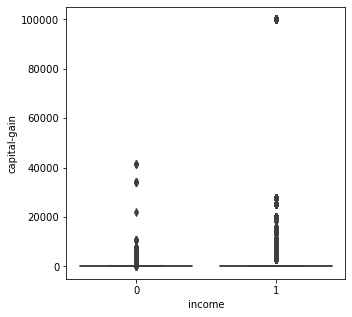

In [37]:
plt.figure(figsize=(5,5))
sns.boxplot(x="income", y="capital-gain", data=df)
plt.show()


Most of the capital gains value is accumulated at 0 for both the income group .

# Boxplot (capital-loss Relationship with income):

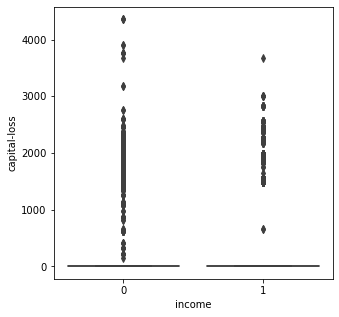

In [38]:
plt.figure(figsize=(5,5))
sns.boxplot(x="income", y="capital-loss", data=df)
plt.show()

This boxplot is similar to the capital gain boxplot where most of the values are concentrated on 0.

# Boxplot (relationship Relationship with income):

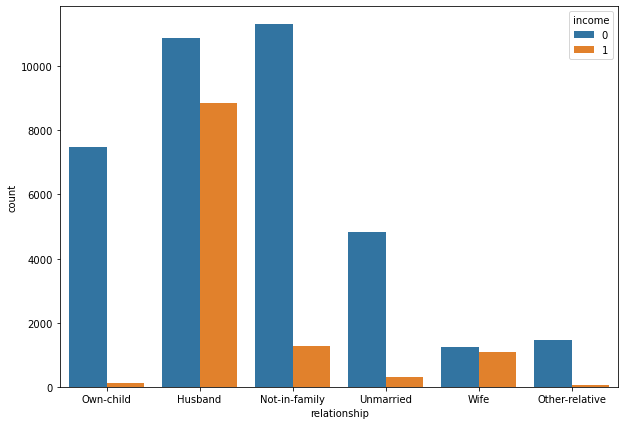

In [39]:
plt.figure(figsize=(10,7))
sns.countplot(x="relationship", hue="income",
            data=df);

Mostly a person with relation as husband in a family has most count of people with more then 50k income

# Boxplot (race Relationship with income):


<Figure size 1440x360 with 0 Axes>

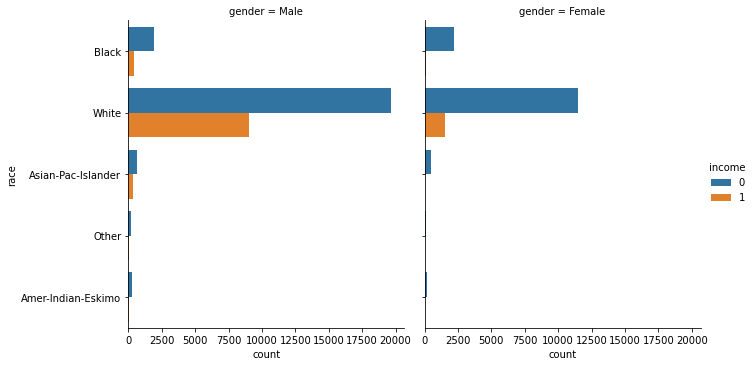

In [40]:
plt.figure(figsize=(20,5))
sns.catplot(y="race", hue="income", kind="count",col="gender", data=df);


It is clear people with Gender male and race as white has the most people with income more then 50k.

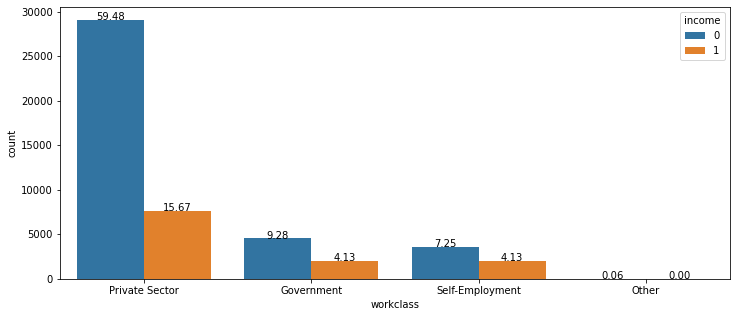

In [41]:
plt.figure(figsize=(12,5))
total = float(len(df["income"]) )

ax = sns.countplot(x="workclass", hue="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

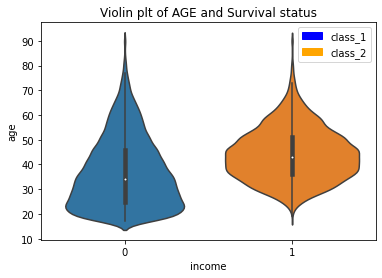

In [42]:
#violin plot
#---------------------------------------------------------------------------------
sns.violinplot(x="income", y="age", data=df, size=8)
plt.title('Violin plt of AGE and Survival status')
blue_patch = mpatches.Patch(color='blue', label='class_1')
orange_patch = mpatches.Patch(color='orange', label='class_2')
plt.legend(handles=[blue_patch,orange_patch],loc=1)
plt.show()


by observation of violin plot. This plot gives the combined information of PDF and box plot. The curve denotes the PDF and middle area denotes box plot.

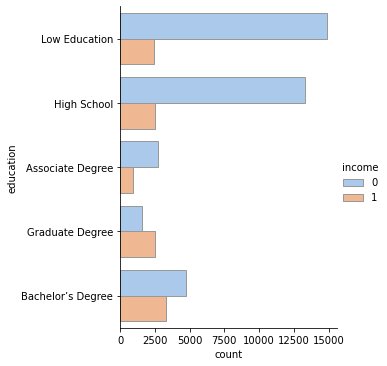

In [43]:
sns.catplot(y="education", hue="income", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);

This data mostly consist of people who has education as hs-grad

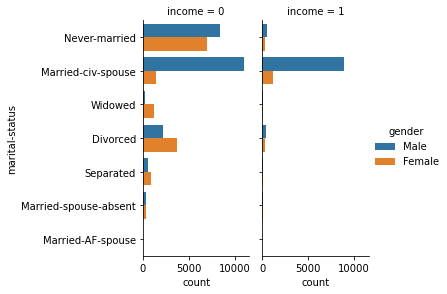

In [44]:
ct = sns.catplot(y='marital-status',hue='gender',col='income',data=df,kind='count',
                height=4,aspect=.7)

The people with marital status as Married-civ-spouce has highest people with income more then 50k.

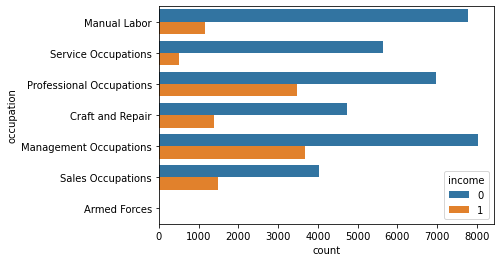

In [45]:
sns.countplot(y="occupation", hue="income",
            data=df)


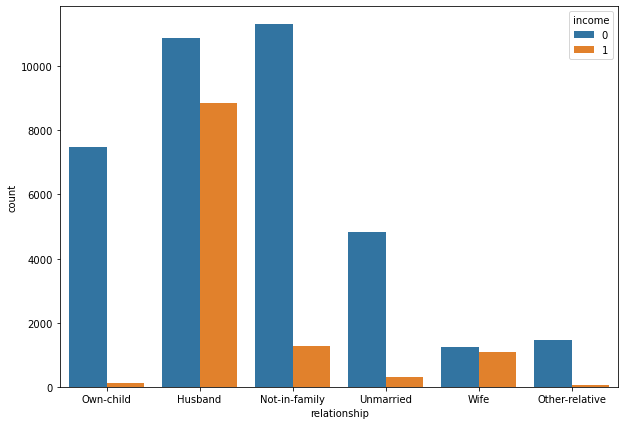

In [46]:
plt.figure(figsize=(10,7))
sns.countplot(x="relationship", hue="income",
            data=df);

<Figure size 1440x504 with 0 Axes>

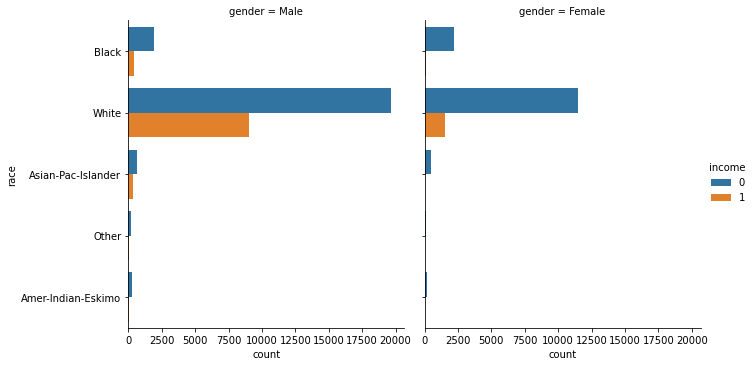

In [47]:
plt.figure(figsize=(20,7))
sns.catplot(y="race", hue="income", kind="count",col="gender", data=df);


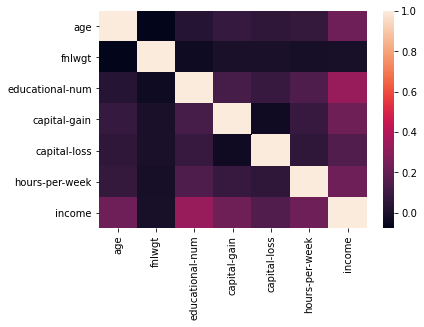

In [48]:
sns.heatmap(df.corr())